In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

-----------------------------------------------------
## Age gender buckets

Population_in_thousands column refer to the population of the entire country (divided into age and gender buckets).

In [8]:
age_gender_df = pd.read_csv('./assets/age_gender_bkts.csv/age_gender_bkts.csv')
age_gender_df.drop(['year'],axis=1,inplace=True)


In [9]:
age_cntr_gndr = age_gender_df.groupby(['country_destination', 'gender']).sum()

In [10]:
percent = []
for row in age_gender_df.values:
    ct = row[1]
    gndr = row[2]
    cntr_gndr_t = (age_cntr_gndr.loc[ct]).loc[gndr].values
    pop_cell = row[3]
    age_gndr_prcnt = (pop_cell/cntr_gndr_t)*100
    age_gndr_prcnt = np.array(age_gndr_prcnt, float)
    percent.append(age_gndr_prcnt)
age_gender_df['population_percentile'] = percent
age_gender_df.population_percentile = age_gender_df.population_percentile.astype(float)
gbkt_map = {}
for i in range(21):
    gbkt=age_gender_df.age_bucket[i]
    gbkt_map[gbkt] = i+1
age_gender_df['order'] = age_gender_df.age_bucket.map(gbkt_map)
age_gender_df.sort_values(['country_destination', 'gender', 'order'],axis=0,inplace=True)
age_gender_df.reset_index(inplace=True,drop=True)
age_gender_df.head()

,age_bucket,country_destination,gender,population_in_thousands,population_percentile,order
0,100+,AU,female,4.0,0.033267,1
1,95-99,AU,female,25.0,0.207917,2
2,90-94,AU,female,94.0,0.781770,3
3,85-89,AU,female,179.0,1.488689,4
4,80-84,AU,female,252.0,2.095808,5


In [8]:
age_gender_df[(age_gender_df.country_destination == 'AU') & (age_gender_df.gender == 'male')]['population_percentile'].tolist()

[0.0084040675687032523,
 0.075636608118329271,
 0.39499117572905285,
 0.99167997310698375,
 1.6724094461719474,
 2.5044121354735691,
 3.4876880410118503,
 4.823934784435667,
 5.344986973695268,
 6.0005042440541221,
 6.5383645684511302,
 6.5383645684511302,
 6.8913354063366672,
 6.698041852256492,
 7.403983528027565,
 7.5216404739894109,
 6.8913354063366672,
 6.4543238927640978,
 6.2442222035465162,
 6.5887889738633492,
 6.9249516766114798]

In [8]:
age_gender_df[(age_gender_df.country_destination == 'AU') & (age_gender_df.gender == 'male')]['population_percentile'].tolist()

[0.0084040675687032523,
 0.075636608118329271,
 0.39499117572905285,
 0.99167997310698375,
 1.6724094461719474,
 2.5044121354735691,
 3.4876880410118503,
 4.823934784435667,
 5.344986973695268,
 6.0005042440541221,
 6.5383645684511302,
 6.5383645684511302,
 6.8913354063366672,
 6.698041852256492,
 7.403983528027565,
 7.5216404739894109,
 6.8913354063366672,
 6.4543238927640978,
 6.2442222035465162,
 6.5887889738633492,
 6.9249516766114798]

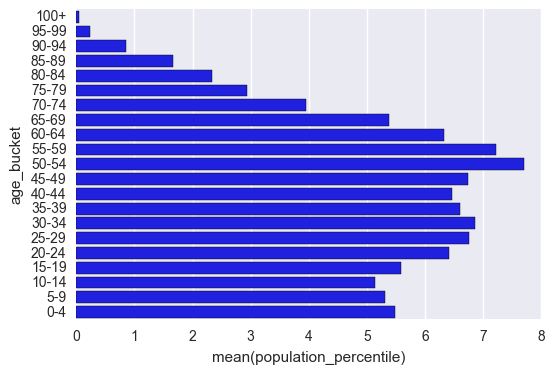

In [11]:
male = age_gender_df[(age_gender_df.country_destination == 'CA') &
                     (age_gender_df.gender == 'female')]['population_percentile']
bkt = age_gender_df[(age_gender_df.country_destination == 'CA') &
                    (age_gender_df.gender == 'female')]['age_bucket']
sns.barplot(male,bkt,color="blue")#.invert_xaxis()
sns.plt.show()


In [11]:
import plotly.plotly as py

KeyError: 0L

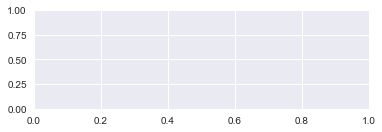

In [42]:
import plotly.plotly as py
import plotly.tools as tls
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

ax1 = plt.subplot(211)
plt.bar(bkt, male)
# plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(212, sharey=ax1)
plt.plot(bkt, female)
# make these tick labels invisible
# plt.setp(ax2.get_xticklabels(), visible=False)

# # share x and y
# ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
# plt.plot(t, s3)

plt.xlim(0.01, 5.0)
fig = plt.gcf()

plotly_fig = tls.mpl_to_plotly(fig)
plot_url = py.plot(plotly_fig)

# ______

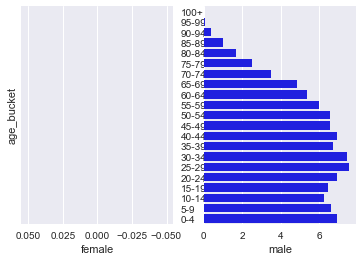

In [15]:
male = age_gender_df[(age_gender_df.country_destination == 'AU') &\
                     (age_gender_df.gender == 'male')]['population_percentile']
female = age_gender_df[(age_gender_df.country_destination == 'AU') &\
                  (age_gender_df.gender == 'female')]['population_percentile']
bkt = age_gender_df[(age_gender_df.country_destination == 'AU') & (age_gender_df.gender == 'male')]['age_bucket']
f, (ax2, ax1) = plt.subplots(ncols=2,sharey=True)
sns.barplot(male,bkt, ax=ax1, color="blue")
sns.barplot(female,bkt, ax=ax2, color="red").invert_xaxis()
ax2.yaxis.tick_right()
ax1.set_ylabel('')  
ax2.set_xlabel('female')
ax1.set_xlabel('male')
sns.plt.show()

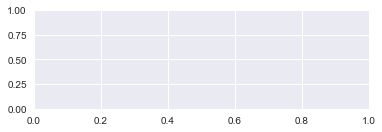

In [24]:
plt.figure(1)                # the first figure

plt.subplot(211)             # the first subplot in the first figure


In [39]:
male1 = male.reset_index(drop=True)
bkt1 = bkt.reset_index(drop=True)
bkt1

0      100+
1     95-99
2     90-94
3     85-89
4     80-84
5     75-79
6     70-74
7     65-69
8     60-64
9     55-59
10    50-54
11    45-49
12    40-44
13    35-39
14    30-34
15    25-29
16    20-24
17    15-19
18    10-14
19      5-9
20      0-4
Name: age_bucket, dtype: object

In [7]:
plt.bar(male1,bkt)
# bkt

NameError: name 'male1' is not defined

TypeError: barh() takes at least 2 arguments (1 given)

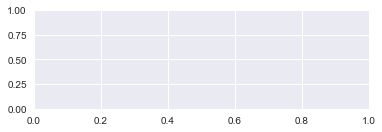

In [22]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.barh(male)
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

In [20]:
AU = zip(male,female,bkt)

In [29]:
AU_df = pd.DataFrame(AU,columns=(['male','female','bkt']))

In [ ]:
countries = age_gender_df.country_destination.unique()
for cnt in countries:
#     cnt_df = age_gender_df[age_gender_df.country_destination == cnt]
    print cnt
    male = age_gender_df[(age_gender_df.country_destination == cnt) &\
                         (age_gender_df.gender == 'male')]['population_percentile'].values.tolist()
    female = age_gender_df[(age_gender_df.country_destination == cnt) &\
                      (age_gender_df.gender == 'female')]['population_percentile'].values.tolist()
    print female[0]
    bkt = age_gender_df[(age_gender_df.country_destination == cnt) & (age_gender_df.gender == 'male')]['age_bucket']
    f, (ax2, ax1) = plt.subplots(1,2,sharey=True)
    print bkt
    sns.barplot(male,bkt, ax=ax1, color="blue")
    sns.barplot(female,bkt, ax=ax2, color="red").invert_xaxis()
    ax2.yaxis.tick_right()
    ax1.set_ylabel('')  
    ax2.set_xlabel('female')
    ax1.set_xlabel('male')
    sns.plt.show()

AU
21     100+
22    95-99
23    90-94
24    85-89
25    80-84
26    75-79
27    70-74
28    65-69
29    60-64
30    55-59
31    50-54
32    45-49
33    40-44
34    35-39
35    30-34
36    25-29
37    20-24
38    15-19
39    10-14
40      5-9
41      0-4
Name: age_bucket, dtype: object


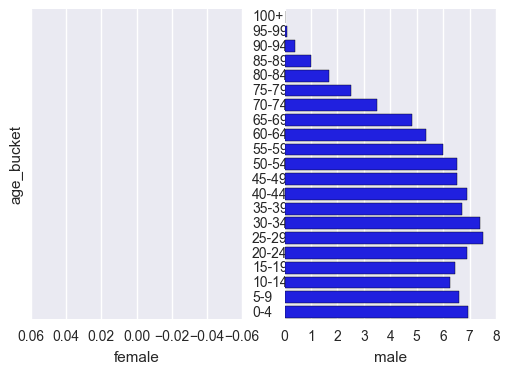

CA
63     100+
64    95-99
65    90-94
66    85-89
67    80-84
68    75-79
69    70-74
70    65-69
71    60-64
72    55-59
73    50-54
74    45-49
75    40-44
76    35-39
77    30-34
78    25-29
79    20-24
80    15-19
81    10-14
82      5-9
83      0-4
Name: age_bucket, dtype: object


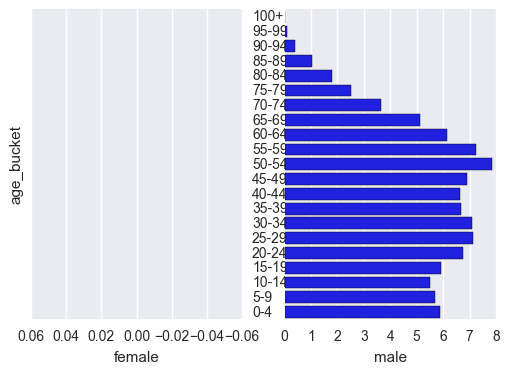

DE
105     100+
106    95-99
107    90-94
108    85-89
109    80-84
110    75-79
111    70-74
112    65-69
113    60-64
114    55-59
115    50-54
116    45-49
117    40-44
118    35-39
119    30-34
120    25-29
121    20-24
122    15-19
123    10-14
124      5-9
125      0-4
Name: age_bucket, dtype: object


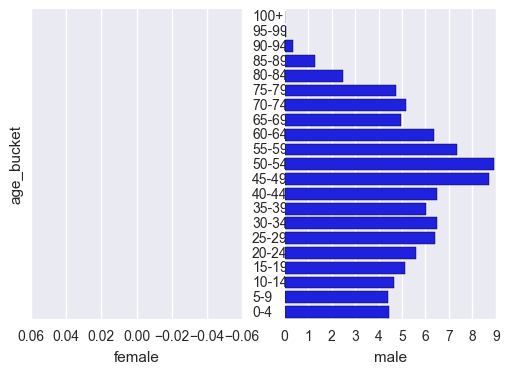

ES
147     100+
148    95-99
149    90-94
150    85-89
151    80-84
152    75-79
153    70-74
154    65-69
155    60-64
156    55-59
157    50-54
158    45-49
159    40-44
160    35-39
161    30-34
162    25-29
163    20-24
164    15-19
165    10-14
166      5-9
167      0-4
Name: age_bucket, dtype: object


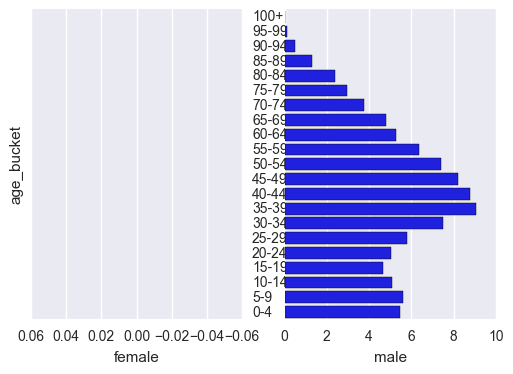

FR
189     100+
190    95-99
191    90-94
192    85-89
193    80-84
194    75-79
195    70-74
196    65-69
197    60-64
198    55-59
199    50-54
200    45-49
201    40-44
202    35-39
203    30-34
204    25-29
205    20-24
206    15-19
207    10-14
208      5-9
209      0-4
Name: age_bucket, dtype: object


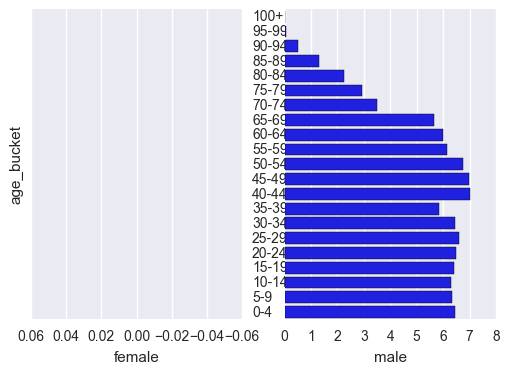

GB
231     100+
232    95-99
233    90-94
234    85-89
235    80-84
236    75-79
237    70-74
238    65-69
239    60-64
240    55-59
241    50-54
242    45-49
243    40-44
244    35-39
245    30-34
246    25-29
247    20-24
248    15-19
249    10-14
250      5-9
251      0-4
Name: age_bucket, dtype: object


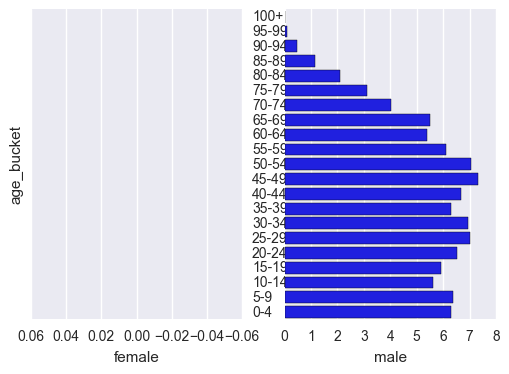

IT
273     100+
274    95-99
275    90-94
276    85-89
277    80-84
278    75-79
279    70-74
280    65-69
281    60-64
282    55-59
283    50-54
284    45-49
285    40-44
286    35-39
287    30-34
288    25-29
289    20-24
290    15-19
291    10-14
292      5-9
293      0-4
Name: age_bucket, dtype: object


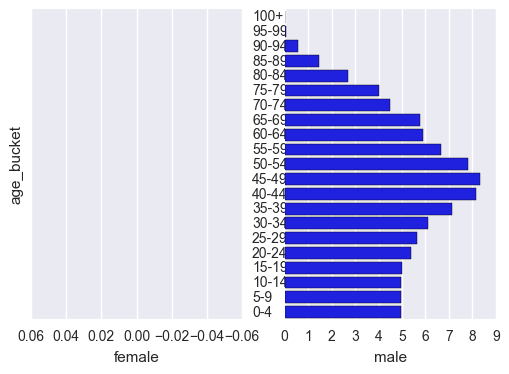

NL
315     100+
316    95-99
317    90-94
318    85-89
319    80-84
320    75-79
321    70-74
322    65-69
323    60-64
324    55-59
325    50-54
326    45-49
327    40-44
328    35-39
329    30-34
330    25-29
331    20-24
332    15-19
333    10-14
334      5-9
335      0-4
Name: age_bucket, dtype: object


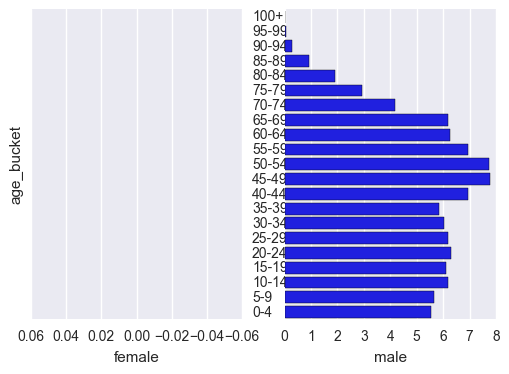

PT
357     100+
358    95-99
359    90-94
360    85-89
361    80-84
362    75-79
363    70-74
364    65-69
365    60-64
366    55-59
367    50-54
368    45-49
369    40-44
370    35-39
371    30-34
372    25-29
373    20-24
374    15-19
375    10-14
376      5-9
377      0-4
Name: age_bucket, dtype: object


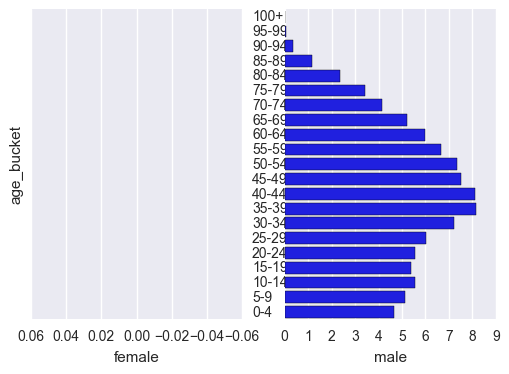

US
399     100+
400    95-99
401    90-94
402    85-89
403    80-84
404    75-79
405    70-74
406    65-69
407    60-64
408    55-59
409    50-54
410    45-49
411    40-44
412    35-39
413    30-34
414    25-29
415    20-24
416    15-19
417    10-14
418      5-9
419      0-4
Name: age_bucket, dtype: object


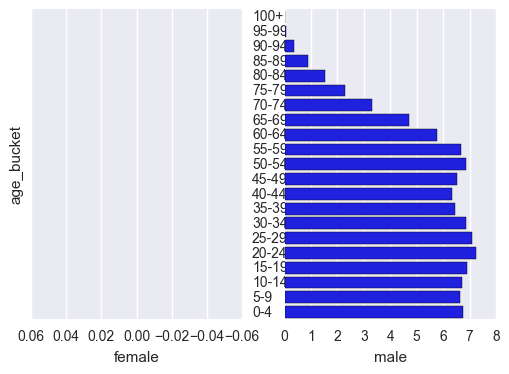

In [19]:
countries = age_gender_df.country_destination.unique()
for cnt in countries:
#     cnt_df = age_gender_df[age_gender_df.country_destination == cnt]
    print cnt
    male = age_gender_df[(age_gender_df.country_destination == cnt) &\
                         (age_gender_df.gender == 'male')]['population_percentile']
    female = age_gender_df[(age_gender_df.country_destination == cnt) &\
                      (age_gender_df.gender == 'female')]['population_percentile']
#     print female[0]
    bkt = age_gender_df[(age_gender_df.country_destination == cnt) & (age_gender_df.gender == 'male')]['age_bucket']
    f, (ax2, ax1) = plt.subplots(1,2,sharey=True)
    print bkt
    sns.barplot(male,bkt, ax=ax1, color="blue")
    sns.barplot(female,bkt, ax=ax2, color="red").invert_xaxis()
    ax2.yaxis.tick_right()
    ax1.set_ylabel('')  
    ax2.set_xlabel('female')
    ax1.set_xlabel('male')
    sns.plt.show()

In [18]:
# fig, axes = plt.subplots(ncols=2, sharey=True)
# axes[0].barh(a, b)
# axes[0].set(title='male')
# axes[1].barh(c, b)
# axes[1].set(title='female')

# # axes[0].invert_xaxis()
# # axes[0].set(yticks=y, yticklabels=states)
# # axes[0].yaxis.tick_right()

## _____________________

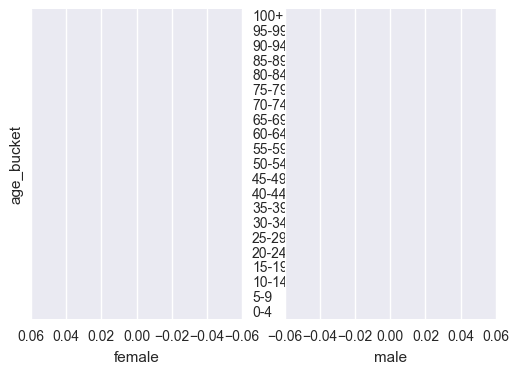

In [16]:
f, (ax2, ax1) = plt.subplots(1,2,sharey=True)
sns.barplot(a,b, ax=ax1, color="blue")
sns.barplot(c,b, ax=ax2, color="red").invert_xaxis()

# ax2.set(yticks=b)
ax2.yaxis.tick_right()
ax1.set_ylabel('')  
ax2.set_xlabel('female')
ax1.set_xlabel('male')
sns.plt.show()

In [ ]:
f

In [ ]:
a

In [15]:
a = age_gender_df[(age_gender_df.country_destination == 'AU') & 
                  (age_gender_df.gender == 'male')]['population_percentile'].tolist()
b = age_gender_df[(age_gender_df.country_destination == 'AU') & 
                  (age_gender_df.gender == 'male')]['age_bucket']
c = age_gender_df[(age_gender_df.country_destination == 'AU') & 
                  (age_gender_df.gender == 'female')]['population_percentile'].tolist()
d = age_gender_df[(age_gender_df.country_destination == 'AU') & 
                  (age_gender_df.gender == 'female')]['age_bucket']


In [ ]:
age_gender_df

# ______

In [ ]:
pd.pivot_table(age_gender_df,index=['order','age_bucket'],\
               columns=['country_destination'],values=['population_in_thousands'], aggfunc='sum')

In [31]:
countries = age_gender_df.country_destination.unique()
ge=[x for x in range(99,3,-5)]
ge.insert(0,100)
ave_age_country_dict = {}
for cnt in countries:
    df = age_gender_df[age_gender_df.country_destination == cnt]
    bkt_pop = df.groupby(['age_bucket','order'])['population_in_thousands'].sum()
    total_pop = bkt_pop.sum()
    bkt_pop = bkt_pop.sortlevel(1).values
    ave_age_cnt = (bkt_pop*ge).sum()/total_pop
    ave_age_cnt = round(ave_age_cnt,2)
    ave_age_country_dict[cnt] = ave_age_cnt
ave_age_country_dict

{'AU': 40.08,
 'CA': 42.08,
 'DE': 46.21,
 'ES': 43.83,
 'FR': 42.53,
 'GB': 42.16,
 'IT': 45.84,
 'NL': 42.92,
 'PT': 44.46,
 'US': 40.13}

In [ ]:
# au_df = age_gender_df[age_gender_df.country_destination == 'AU']
# augp = au_df.groupby(['age_bucket','order'])['population_in_thousands'].sum()
# aut = augp.sum()
# augp = augp.sortlevel(1).values
# print aut
# print augp
# print augp*ge
# (augp*ge).sum()/augp.sum()

In [ ]:
ave_age_country_dict.values()

In [ ]:
country_population_df = pd.DataFrame(age_gender_df.groupby('country_destination')['population_in_thousands'].agg('sum').head(50))
country_population_df.population_in_thousands = country_population_df.population_in_thousands/1000
country_population_df['population_M']=country_population_df['population_in_thousands']
country_population_df.drop('population_in_thousands',axis=1,inplace=True)
country_population_df['prc_young'] = prc_young
country_population_df['avg_age'] = ave_age_country_dict.values()
country_population_df

In [ ]:
country_population_df.loc['AU']

-----------------------------------------------------
## Countries

In [ ]:
countries_df = pd.read_csv('./assets/countries.csv/countries.csv')
print countries_df.shape
countries_df.head()

In [ ]:
countries_final_df = pd.merge(countries_df, country_population_df, left_on='country_destination',right_index=True)
countries_final_df

In [ ]:
countries_final_df.info()

In [ ]:
countries_final_df.describe()

In [ ]:
print (len(countries_final_df['destination_language '].unique()))
countries_final_df['destination_language '].unique()

In [ ]:
print (len(countries_final_df['language_levenshtein_distance'].unique()))
countries_final_df['language_levenshtein_distance'].unique()

In [ ]:
countries_final_df.to_pickle('./countries_age.pkl')  # where to save it, usually as a .pkl
# df = pd.read_pickle(file_name)

In [ ]:
countries_final_df.to_csv('countries_age9.csv')